In [1]:
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Fetching_data

Using Pandas to load the dataset into this notebook. Using pandas we can read our datafile (car data.csv) with the line below. Data-set loaded will be assigned to the variable vehicles.

In [2]:
car=pd.read_csv(r"C:\Users\vikas pandey\Desktop\car data.csv")

Let's see first 5 row

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Above is a concise summary of our dataframe printing columns' data-type,index data-type and number of non-null values !

In [5]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Looking at the result of the above query it seems clear we have no missing/null values in our dataset!

In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Exploratory Data Analysis

Visualizing the categorical data :

# 1.Owner_Type

Let's examine the selling price based on the type of owner

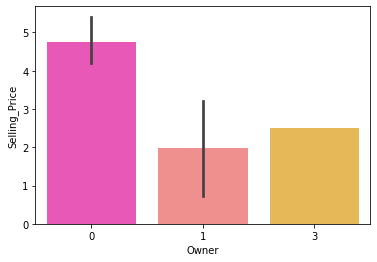

In [7]:
sns.barplot(x='Owner',y='Selling_Price',data=car,palette='spring')

It seems that the vehicles belonging to owner 0 have the highest selling price

# 2.Transmission_type

Let's examine the selling price for manual and automatic vehicles!

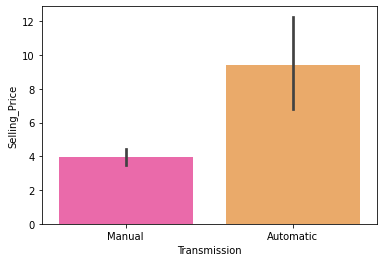

In [8]:
sns.barplot(x='Transmission',y='Selling_Price',data=car,palette='spring')

We can see that automatic vehicles are found to have a large resale value in the market compared to manual transmission.

# 3.Fuel_Type

Let's examine the selling price based on different types of engine fuel!



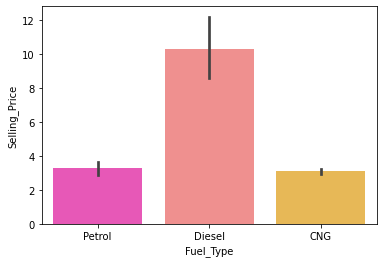

In [9]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car,palette='spring')

Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles

# 4.Seller_type

Let's get an idea of the selling price for a vehicle sold by a Dealer vs Individual!

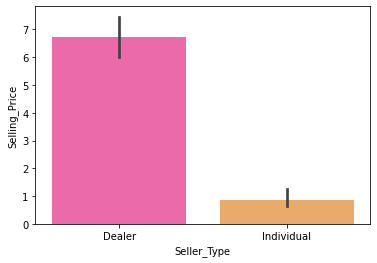

In [10]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=car,palette='spring')

Dealers can sell vehicles at a higher selling price than a general individual. No surprises at all !

# Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :




### 1.kms Driven

<Figure size 720x720 with 0 Axes>

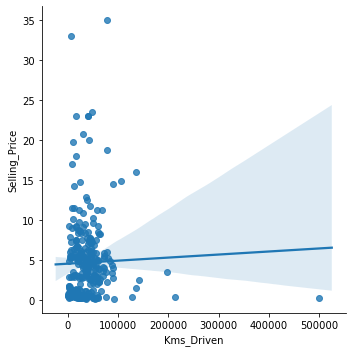

In [11]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=car)

The selling price is found to be higher for vehicles with less kms covered under the belt!

### 2.Present_Price

<Figure size 720x720 with 0 Axes>

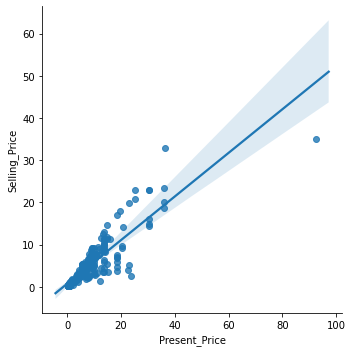

In [12]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=car)

Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.

### 3.Vechicle_age

In [13]:
car['Vehicle_Age']=2020- car['Year']

In [14]:
car.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


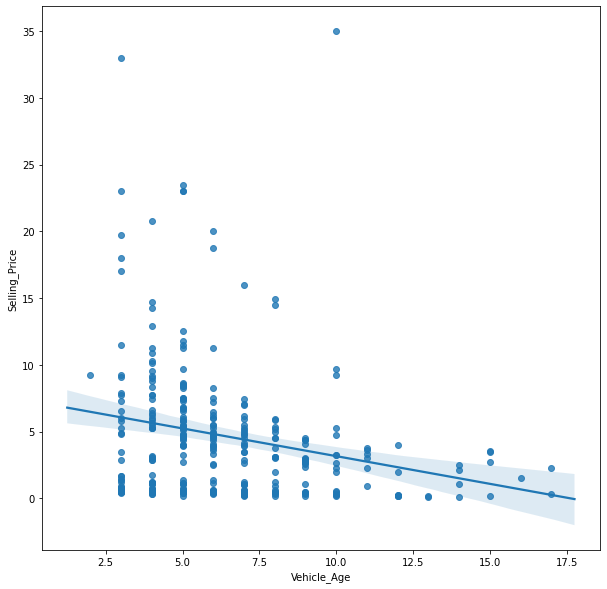

In [15]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=car)

It seems the selling price decreases overall for older/ageing vehicles!

# Feature Engineering

We shall convert categorical features to numeric type!

In [16]:
car=pd.get_dummies(car,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

In [17]:
car.drop(columns=['Car_Name','Year'],inplace=True)

In [18]:
car.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


# Understanding and Visualizing Correlations amongst the features

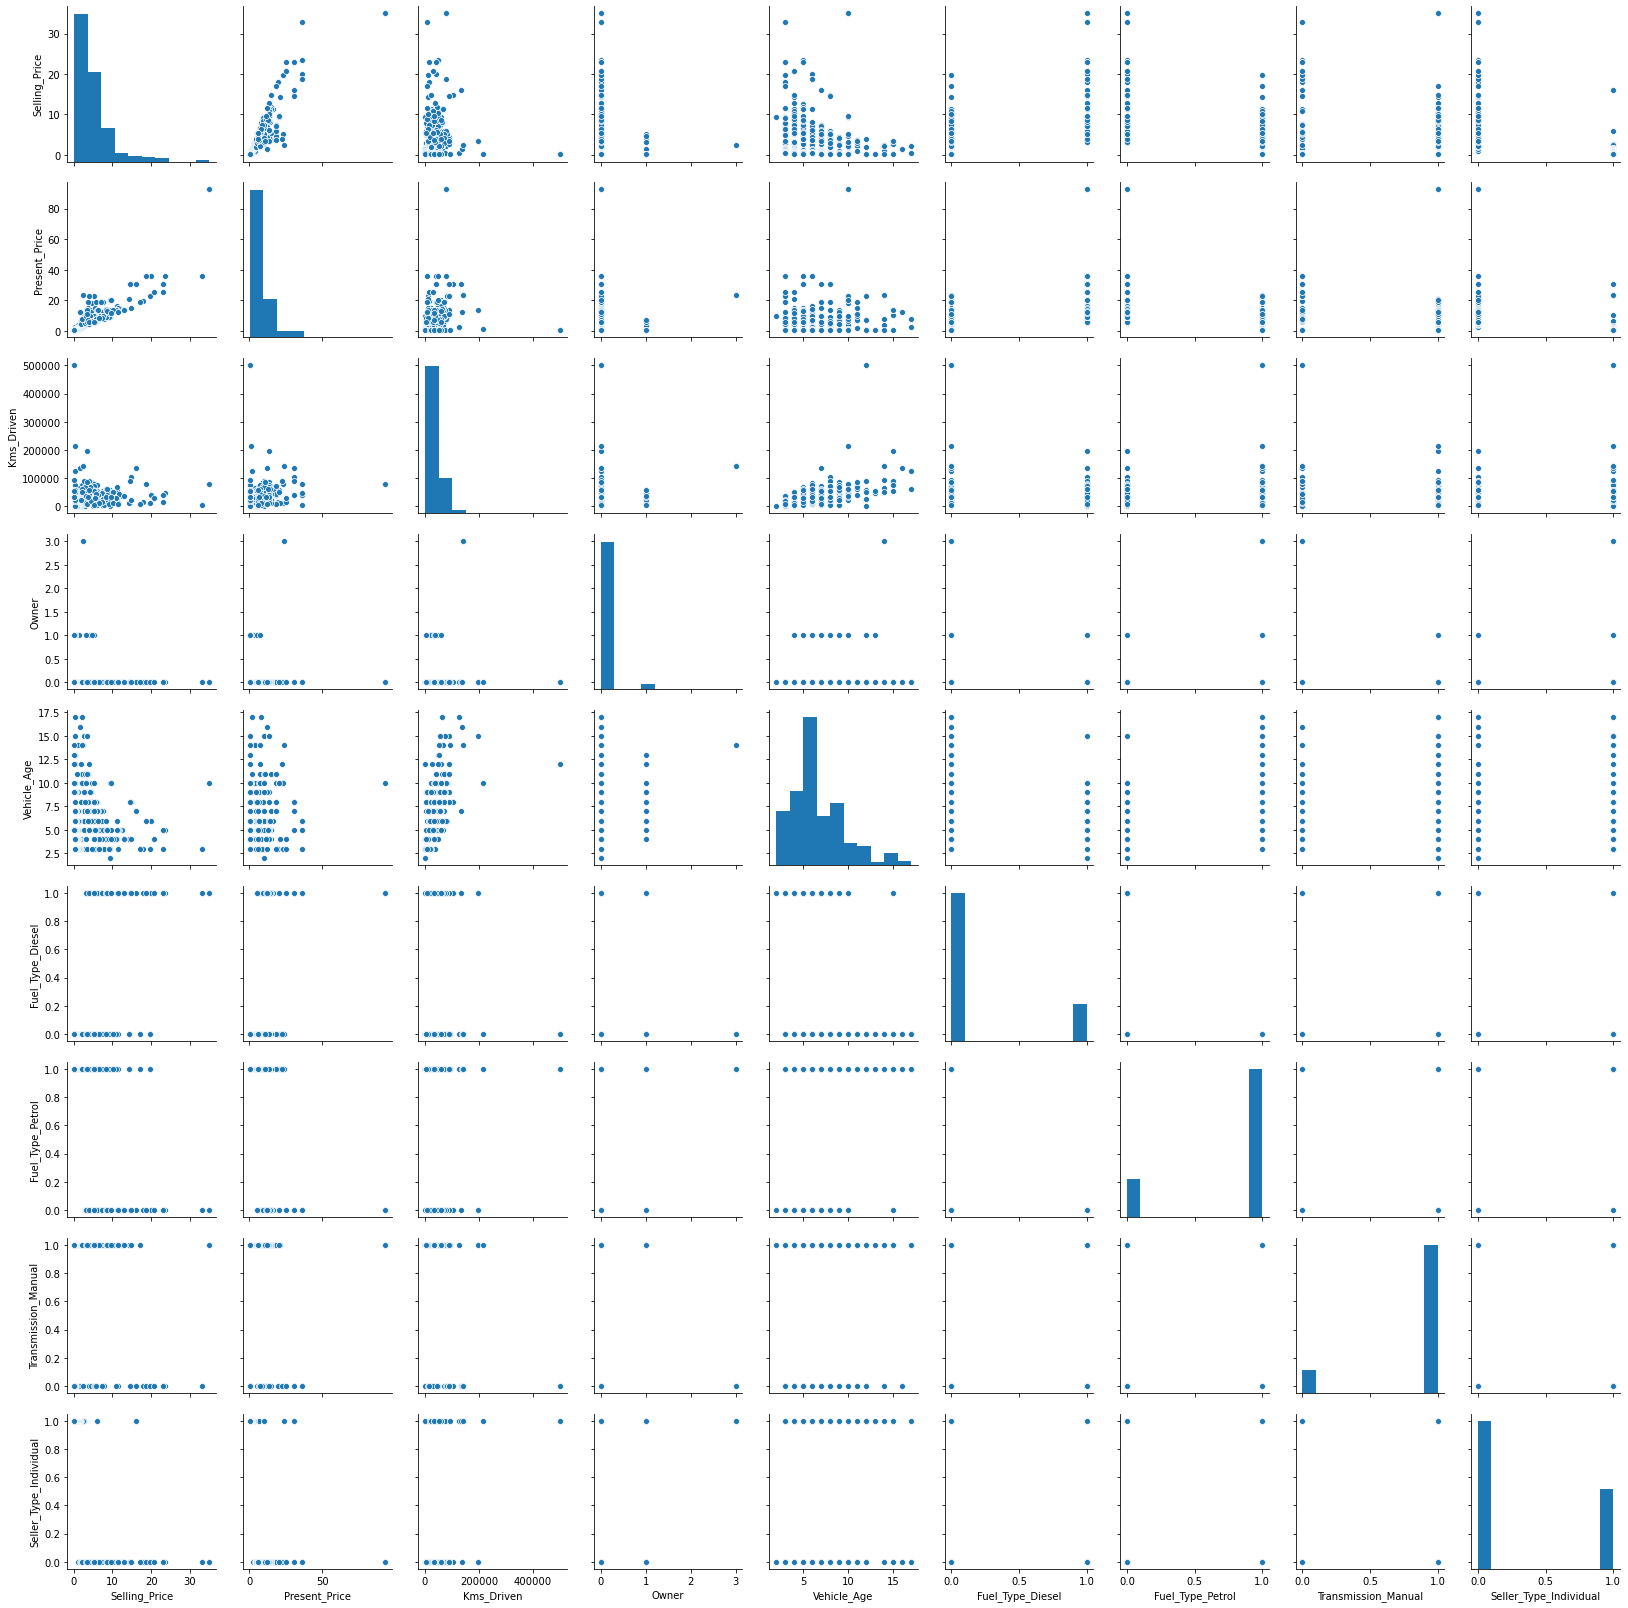

In [19]:
sns.pairplot(car)

Selling price seems to be considerably correlated with the Present Price feature.

# Correlation HeatMap

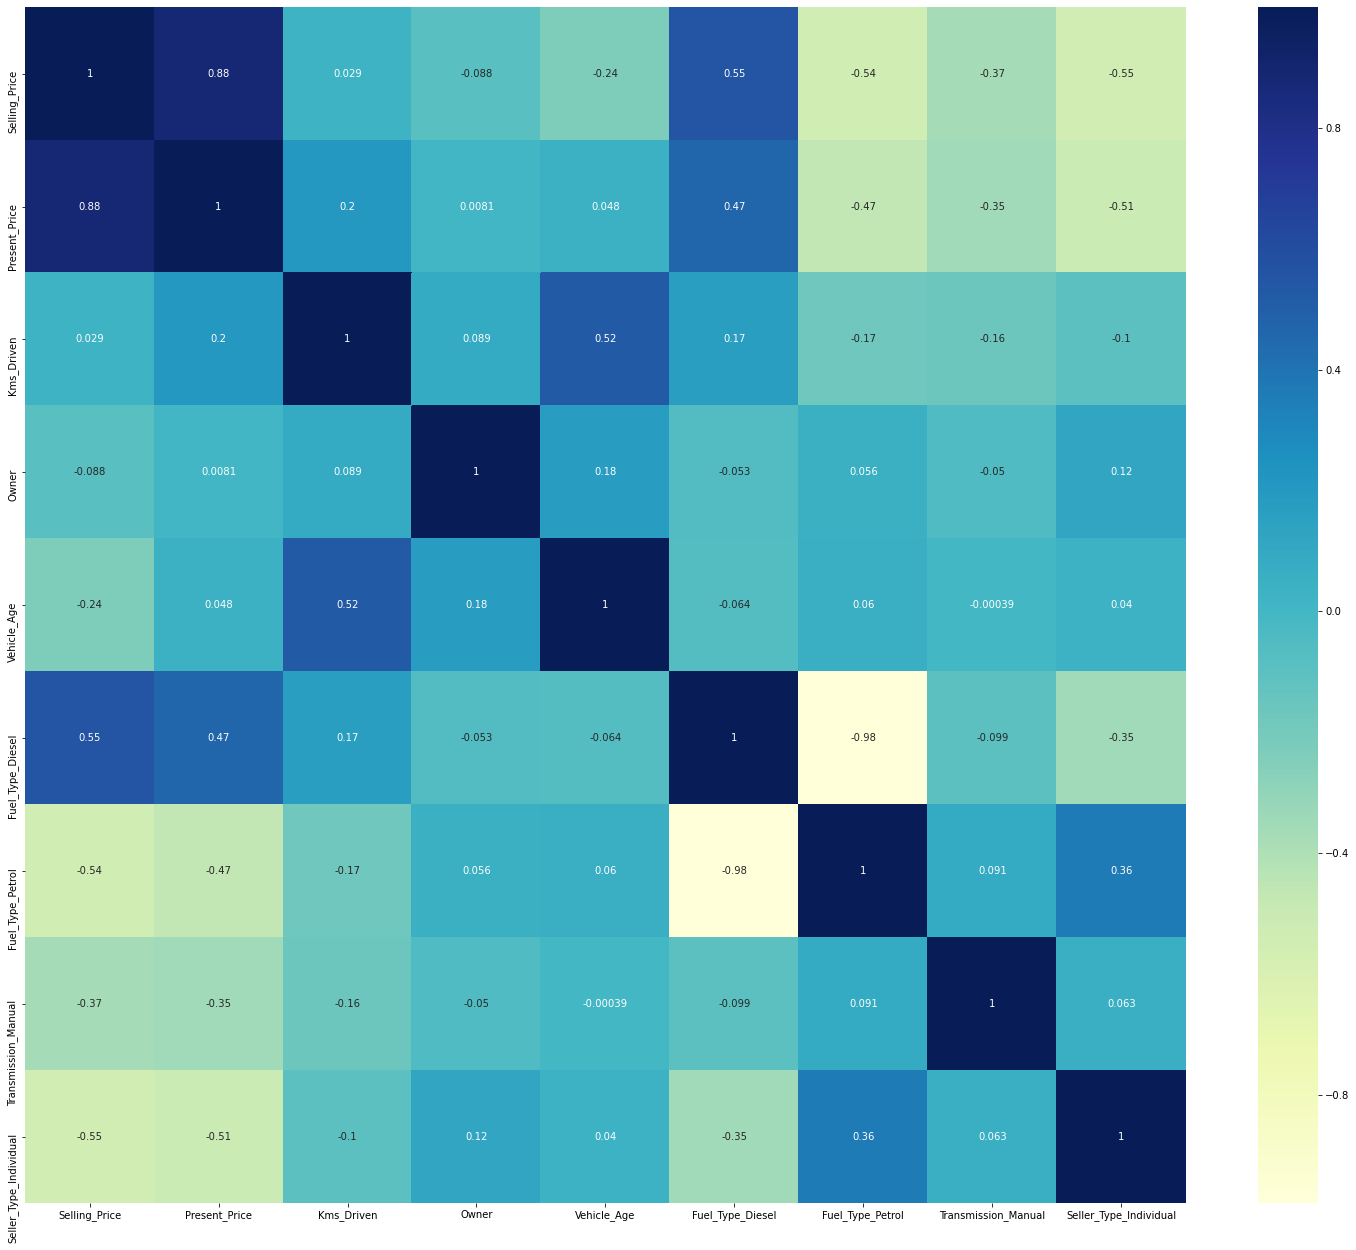

In [20]:
correlations = car.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(car[indx].corr(),annot=True,cmap="YlGnBu")

# Applying Regression Model

In [23]:
y=car.Selling_Price
x=car.drop(["Selling_Price"],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


In [25]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [26]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.8625260513315252 

CV scores: [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925] 

CV scores mean: 0.8412278932604182


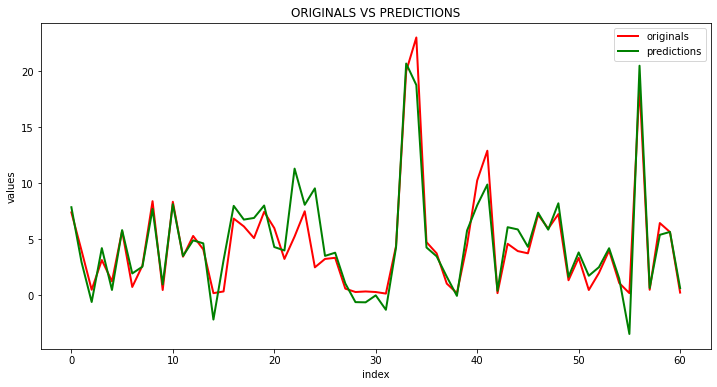

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

# Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.8413177178519572
0.001


Lasso(alpha=0.001, normalize=True) 

r_2 score : 0.8659944612951955 

CV scores: [0.89881469 0.89910921 0.83014662 0.81860442 0.7635619 ] 

CV scores mean: 0.842047366566835


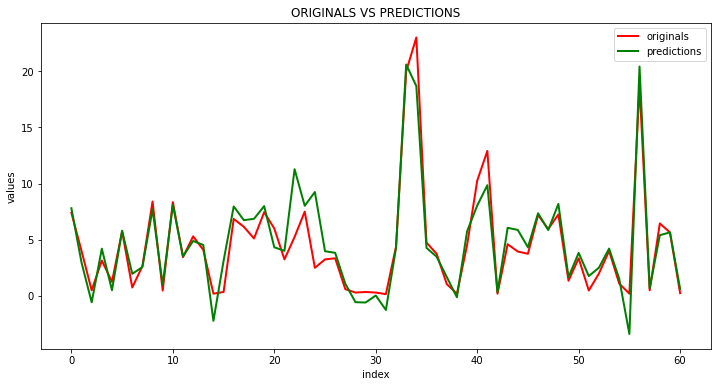

In [29]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,x_train,y_train,x_test,y_test)

# Ridge Regression


In [30]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.841227704017515
0.001


Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.8634059881080344 

CV scores: [0.89994728 0.89573723 0.82876027 0.81787847 0.77693746] 

CV scores mean: 0.8438521451678229


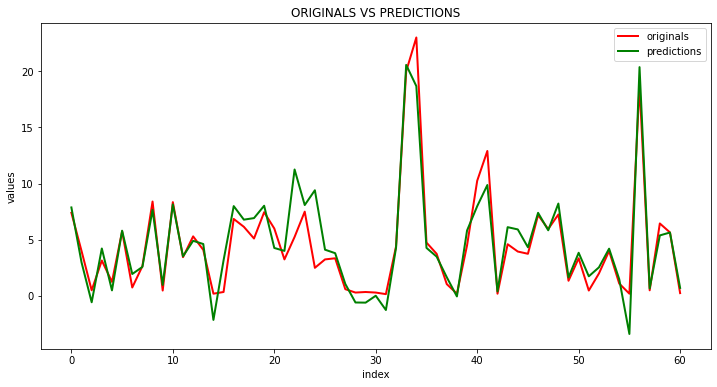

In [31]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,x_train,y_train,x_test,y_test)

# Decision Tree Regressor

DecisionTreeRegressor() 

r_2 score : 0.9512944885501484 

CV scores: [0.93117659 0.89531893 0.88488553 0.90444459 0.74202381] 

CV scores mean: 0.8715698894979014


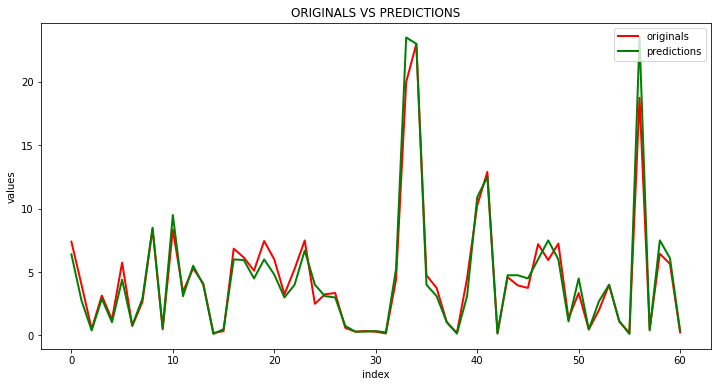

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

# Random Forest Regressor

RandomForestRegressor(random_state=42) 

r_2 score : 0.8830157529821793 

CV scores: [0.93231391 0.96406577 0.85582178 0.93854945 0.72985359] 

CV scores mean: 0.8841208997208121


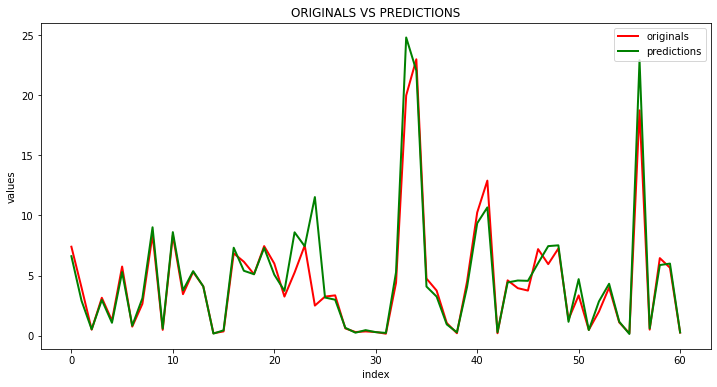

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

In [34]:
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.862526,0.841228
1,Lasso,0.865994,0.842047
2,Ridge,0.863406,0.843852
3,DecisionTreeRegressor,0.951294,0.871570
4,RandomForestRegressor,0.883016,0.884121
